In [1]:
import cv2
import numpy as np

In [2]:
#for debugging not needed in end
from matplotlib import pyplot as plt
imgpath = 'tests/controled4.jpg'

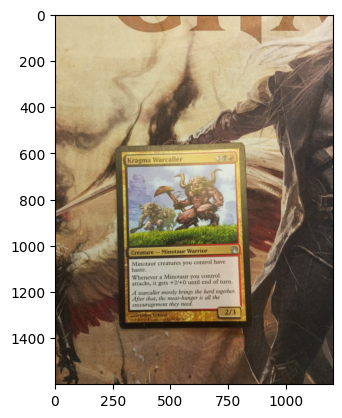

In [3]:
# show original img
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Original Dimensions :  (1600, 1204, 3)
Resized Dimensions :  (1328, 1000, 3)


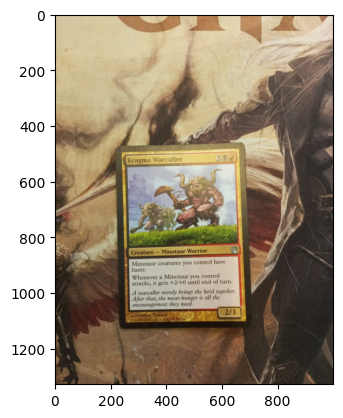

In [4]:
# resize we want to change it to 1000xh for easy of use and good faster computions 
print('Original Dimensions : ',img.shape)
 
width = 1000
height = int(1000* (float(img.shape[0]) / float(img.shape[1])))
dim = (width, height)
 
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',img.shape)
 
plt.imshow(img)
plt.show()

In [5]:
# lets move to LaB space
img = cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
light,A,B = cv2.split(img)
#plt.hist(light.flat,bins=100,range=(0,255))


In [6]:
equlight = cv2.equalizeHist(light)
#plt.hist(equlight.flat,bins=100,range=(0,255))
#plt.imshow(equlight)
#plt.show()

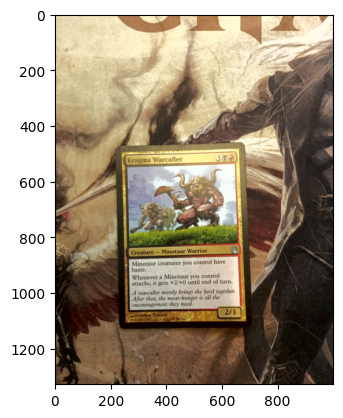

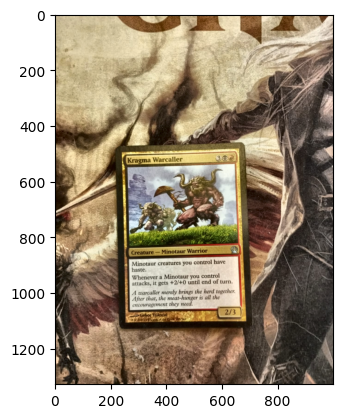

In [7]:
#apply CLAHE
img = cv2.merge((equlight,A,B))
img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
clahe = cv2.createCLAHE(clipLimit = 3.0)
clahe_img = clahe.apply(light)
clahe_lab_img = cv2.merge((clahe_img,A,B))
clahe_lab_img = cv2.cvtColor(clahe_lab_img, cv2.COLOR_LAB2RGB)

plt.imshow(img)
plt.show()
plt.imshow(clahe_lab_img)
plt.show()

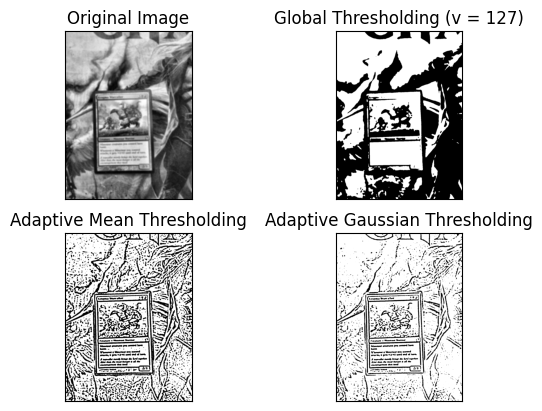

In [8]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img = cv2.imread(imgpath)
assert img is not None, "file could not be read, check with os.path.exists()"
width = 1000
height = int(1000* (float(img.shape[0]) / float(img.shape[1])))
dim = (width, height)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

#go crazy with blur kernel
#note playableValue
img = cv2.GaussianBlur(cl1,(15,15),cv2.BORDER_DEFAULT)
#img = cv2.medianBlur(cl1,5) # split into 2 options

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])

plt.show()


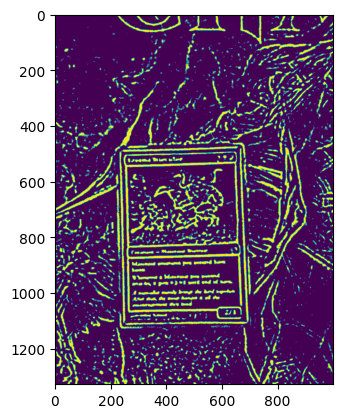

In [9]:
# Threshold and morph close
thresh = cv2.threshold(th3, 160, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()

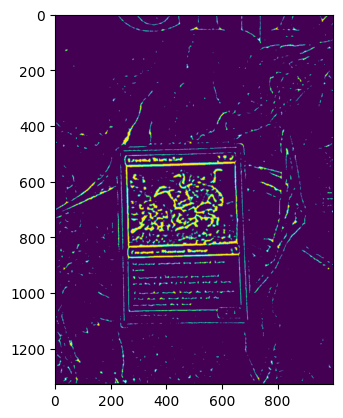

In [10]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = thresh.copy()
cv2.drawContours(clone, contours, -1, (0, 255, 0), 3)
plt.imshow(clone)
plt.show()

3325
found area:155828.5
1


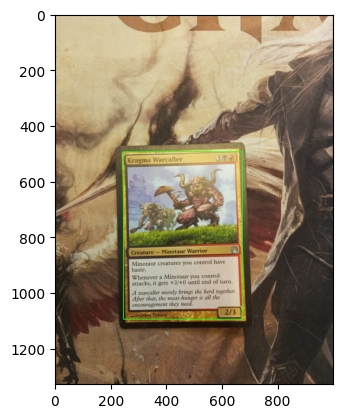

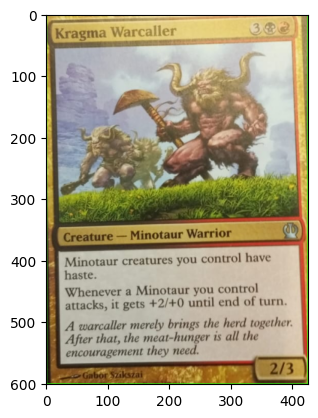

In [11]:
# Find contours and filter using threshold area
#cnts[0] if len(cnts) == 2 else cnts[1] -- not sure about this
cnts = contours 
imclone = original_img.copy()
min_area = 80000
max_area = 500000
image_number = 0
print(len(cnts))
ROI = img
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        print("found area:" + str(area))
        x,y,w,h = cv2.boundingRect(c)
        #assume y>200
        ROI = imclone[y:y+h, x:x+w]
        #cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(imclone, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1
print(str(image_number))
plt.imshow(imclone)
plt.show()
plt.imshow(ROI)
plt.show()
